📦 Desafio 50 — Análise de Vendas em E-commerce com Dados Reais
📂 Dataset: Clique aqui para baixar o CSV

Você recebeu um conjunto de dados de vendas em um e-commerce. O arquivo contém problemas reais: valores ausentes, duplicatas e possíveis outliers. Seu desafio é identificar padrões de consumo, tratar os dados e aplicar uma análise preditiva simples.

🔍 Tarefas:

(Tratamento de Dados)

    Identifique e trate valores ausentes, dados duplicados e outliers na coluna valor.

(Análise Geral)

    Qual categoria mais aparece nas vendas com reclamação?

(Gráfico)

    Crie um gráfico de barras com o valor médio das vendas por forma_pagamento.

(Machine Learning Básico)

    Treine um modelo de classificação para prever se uma venda terá reclamacao.
Sugestões:

Use LogisticRegression ou RandomForestClassifier.

Aplique train_test_split e avalie com accuracy_score e classification_report.

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [30]:
df = pd.read_csv("dia_50_vendas_ecommerce.csv")
df.head()

,id_venda,categoria,valor,forma_pagamento,tempo_entrega_dias,status_entrega,reclamacao
0,9151,Eletrônicos,295.57,Pix,7.0,Entregue,Não
1,5360,Esportes,184.91,Boleto,8.0,Em trânsito,Não
2,6965,Esportes,248.98,Transferência,16.0,NaN,Sim
3,4972,Roupas,323.10,Transferência,NaN,Entregue,Não
4,8752,Esportes,79.98,Transferência,6.0,Em trânsito,Não


In [33]:
#Identifique e trate valores ausentes, dados duplicados e outliers na coluna valor.
df = df.drop_duplicates()

#status_entrega
df["status_entrega"] = df["status_entrega"].fillna("Sem Informação")

#Valor
q1 = df["valor"].quantile(0.25)
q3 = df["valor"].quantile(0.75)

iqr = q3 - q1

limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr
df = df[(df["valor"] >= limite_inferior) & (df["valor"] <= limite_superior)]
df["valor"] = df["valor"].fillna(df["valor"].mean())

#tempo_entrega_dias	
df["tempo_entrega_dias"] = df["tempo_entrega_dias"].fillna(
    df.groupby("categoria")["tempo_entrega_dias"].transform("mean")
)

df.isnull().sum()

id_venda              0
categoria             0
valor                 0
forma_pagamento       0
tempo_entrega_dias    0
status_entrega        0
reclamacao            0
dtype: int64

In [50]:
#Qual categoria mais aparece nas vendas com reclamação?
categoriaReclamacao = df.groupby("categoria")["reclamacao"].value_counts().unstack().sort_values(by="Sim")
print(categoriaReclamacao.head(1))

reclamacao  Não  Sim
categoria           
Casa         77   11


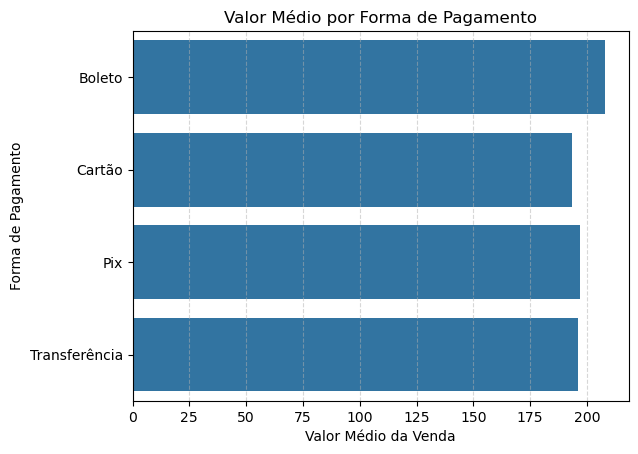

Index(['id_venda', 'categoria', 'valor', 'forma_pagamento',
       'tempo_entrega_dias', 'status_entrega', 'reclamacao'],
      dtype='object')


In [70]:
#Crie um gráfico de barras com o valor médio das vendas por forma_pagamento.
formaPagamentoMedia = df.groupby("forma_pagamento")["valor"].mean()
sns.barplot(x=formaPagamentoMedia.values, y=formaPagamentoMedia.index)
plt.xlabel("Valor Médio da Venda")
plt.ylabel("Forma de Pagamento")
plt.title("Valor Médio por Forma de Pagamento")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

In [87]:
#Treine um modelo de classificação para prever se uma venda terá reclamacao.
df_modelo = df.copy()
df_modelo = pd.get_dummies(df_modelo[["forma_pagamento", "categoria", "status_entrega"]], drop_first=True)

le = LabelEncoder()
df_modelo['reclamacao'] = le.fit_transform(df['reclamacao'])

X = df_modelo.drop("reclamacao", axis=1)
y = df_modelo["reclamacao"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print(f"Acurácia: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

importances = pd.Series(modelo.feature_importances_, index=X.columns).sort_values(ascending=False).round(2) * 100
print(importances)

Acurácia: 0.8235294117647058
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       102
           1       0.00      0.00      0.00        17

    accuracy                           0.82       119
   macro avg       0.43      0.48      0.45       119
weighted avg       0.73      0.82      0.77       119

forma_pagamento_Pix              12.0
status_entrega_Em trânsito       12.0
categoria_Eletrônicos            12.0
forma_pagamento_Transferência    12.0
status_entrega_Entregue          11.0
categoria_Roupas                  9.0
status_entrega_Sem Informação     9.0
categoria_Livros                  9.0
forma_pagamento_Cartão            8.0
categoria_Esportes                8.0
dtype: float64
